<h2><center> Project Individual Nº1</center></h2>
<div align=center><h3>EDA<br>Exploratory Data Analysis</h3></div>


In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import skew
from math import sqrt
from numpy import mean, var
from sklearn import preprocessing
from wordcloud import WordCloud



In [3]:
# create df with steam_games
# df = pd.read_csv('steam_games.csv')
df = pd.read_parquet('csv/df_steam_games.gzip')

ImportError: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.
 - Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10374 entries, 88310 to 120443
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Item_Id       10374 non-null  object 
 1   App_Name      10374 non-null  object 
 2   Release_Date  10374 non-null  object 
 3   Release_Year  10374 non-null  int32  
 4   Price         10374 non-null  float64
 5   Genres        10374 non-null  object 
 6   Specs         10374 non-null  object 
 7   Early_Access  10374 non-null  bool   
 8   Developer     10374 non-null  object 
 9   Publisher     10374 non-null  object 
dtypes: bool(1), float64(1), int32(1), object(7)
memory usage: 780.1+ KB


In [4]:
df.head()


,Item_Id,App_Name,Release_Date,Release_Year,Price,Genres,Specs,Early_Access,Developer,Publisher
88310,761140,Lost Summoner Kitty,2018-04-01,2018,4.99,"Action, Casual, Indie, Simulation, Strategy",Single-player,False,Kotoshiro,Kotoshiro
88311,643980,Ironbound,2018-04-01,2018,0.00,"Free to Play, Indie, RPG, Strategy","Single-player, Multi-player, Online Multi-Play...",False,Secret Level Srl,Making Fun Inc
88313,767400,,2017-07-12,2017,0.99,"Action, Adventure, Casual",Single-player,False,,
88315,772540,Battle Royale Trainer,2018-04-01,2018,3.99,"Action, Adventure, Simulation","Single-player, Steam Achievements",False,Trickjump Games Ltd,Trickjump Games Ltd
88316,774276,Snow All Access Basic Pass,2018-04-01,2018,9.99,"Free to Play, Indie, Simulation, Sports","Single-player, Multi-player, Online Multi-Play...",False,Poppermost Productions,Nan


In [5]:
text = ' '.join(df['App_Name'].astype(str))

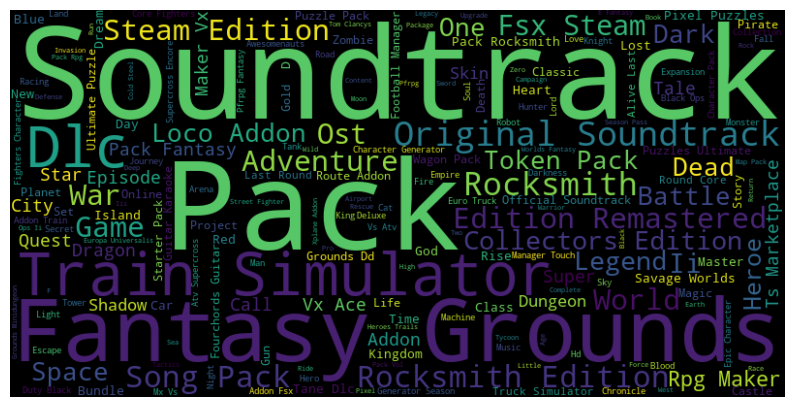

In [6]:
wordcloud = WordCloud(width=800, height=400, max_font_size=150, random_state=42).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

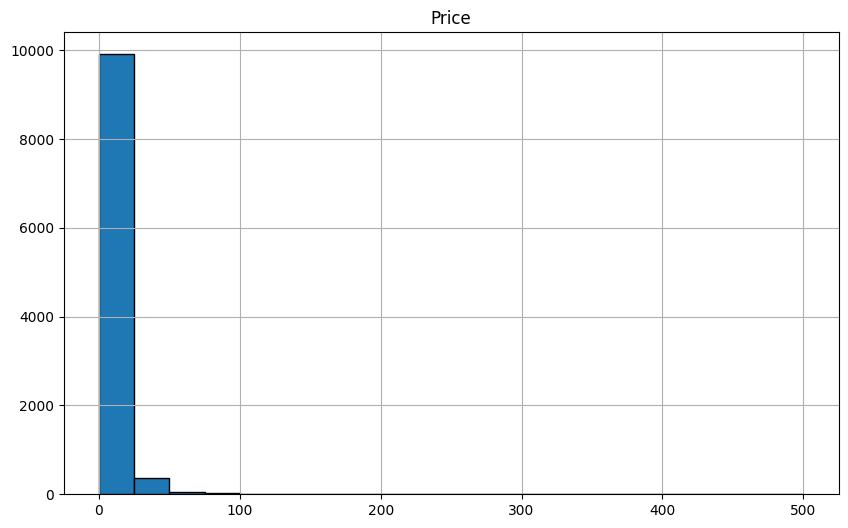

In [7]:
columnas = ['Price']
df[columnas].hist(bins=20, figsize= (10, 6),edgecolor='black')
plt.show()

El histograma nos permite visualizar la distribucion de frecuencia de los datos.Es decir como se distribuyen los valores La frecuencia se representa en el eje y, mientras que los intervalos de valores se representan en el eje x. Se observa un sesgo a la claramente a la izquierda esto significa que hay una distribución asimétrica de los datos Esto puede indicar que hay valores atípicos o extremadamente altos en el conjunto de datos que están desplazando la distribución hacia la derecha.que vamos a tener que analizar

outliers

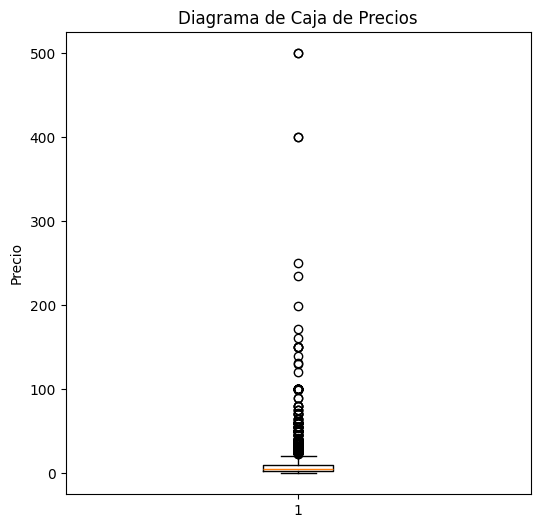

In [8]:
plt.figure(figsize=(6, 6),)
plt.boxplot(df['Price'])
plt.ylabel('Precio')
plt.title('Diagrama de Caja de Precios')
plt.show()

In [9]:
#Rango de precios
price_range = df['Price'].max() - df['Price'].min()
print("Precio Máximo:", df['Price'].max())
print("Precio Mínimo:", df['Price'].min())
print("Rango de Precios:", price_range)

Precio Máximo: 499.99
Precio Mínimo: 0.0
Rango de Precios: 499.99


Precio Máximo: 499.99
Precio Mínimo: 0.0
Rango de Precios: 499.99


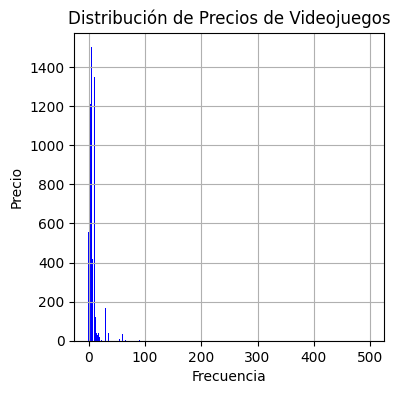

In [10]:
# Calcular el rango de precios
price_range = df['Price'].max() - df['Price'].min()

# Imprimir información
print("Precio Máximo:", df['Price'].max())
print("Precio Mínimo:", df['Price'].min())
print("Rango de Precios:", price_range)

# Obtener los valores únicos de los precios
unique_prices = df['Price'].unique()

# Calcular la frecuencia de cada precio
price_counts = df['Price'].value_counts()

# Crear el gráfico de barras 
plt.figure(figsize=(4, 4))
plt.bar(unique_prices, price_counts[unique_prices], color='blue')
plt.title('Distribución de Precios de Videojuegos')
plt.xlabel('Frecuencia')
plt.ylabel('Precio')
plt.grid(True)
plt.show()

podemos ver que el precio max encontrado es de 995 y el minimo serian los free play de 0.00



In [12]:
def rango_precios(df):
    rangos = {
        "0-60": 0,
        "61-100": 0,
        "101 o más": 0
    }
    for precio in df['Price']:
        if precio >= 0 and precio <= 60:
            rangos["0-60"] += 1
        elif precio <= 100:
            rangos["61-100"] += 1
        else:
            rangos["101 o más"] += 1
    
    return rangos

resultados = rango_precios(df)
for rango, cantidad in resultados.items():
    print(f"{rango}: {cantidad}")

0-60: 10314
61-100: 43
101 o más: 17


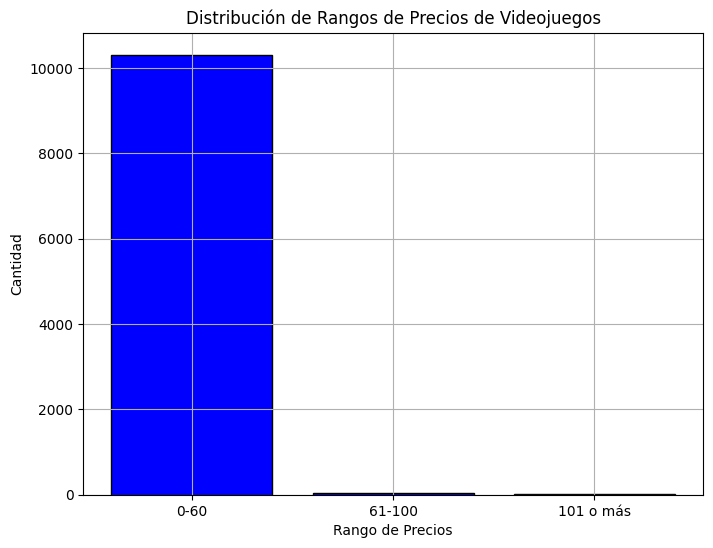

In [13]:
# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(resultados.keys(), resultados.values(), color='blue',edgecolor='black')
plt.title('Distribución de Rangos de Precios de Videojuegos')
plt.xlabel('Rango de Precios')
plt.ylabel('Cantidad')
plt.grid(True)
plt.show()

Realizo un estudio de los intervalos en los precios para ver donde hay mayor concentración de juegos por precio.Se puede ver que de 0 a 60 es donde se concentran mas(10279).

In [14]:
# Contar la cantidad de juegos para cada categoría
single_player_count = df[df['Specs'].str.contains('Single-player', case=False)]['Specs'].count()
multi_player_count = df[df['Specs'].str.contains('Multi-player', case=False)]['Specs'].count()
online_multiplayer_count = df[df['Specs'].str.contains('Online Multi-Player', case=False)]['Specs'].count()
SMO_count = df[df['Specs'].str.contains('Single-player, Multi-player, Online Multi-Play..', case=False)]['Specs'].count()
print(f'Cantidad de juegos Single-player: {single_player_count}')
print(f'Cantidad de juegos Multi-player: {multi_player_count}')
print(f'Cantidad de juegos Online Multi-Player: {online_multiplayer_count}')
print(f'Cantidad de juegos SMO: {SMO_count}')

Cantidad de juegos Single-player: 9355
Cantidad de juegos Multi-player: 3258
Cantidad de juegos Online Multi-Player: 746
Cantidad de juegos SMO: 414


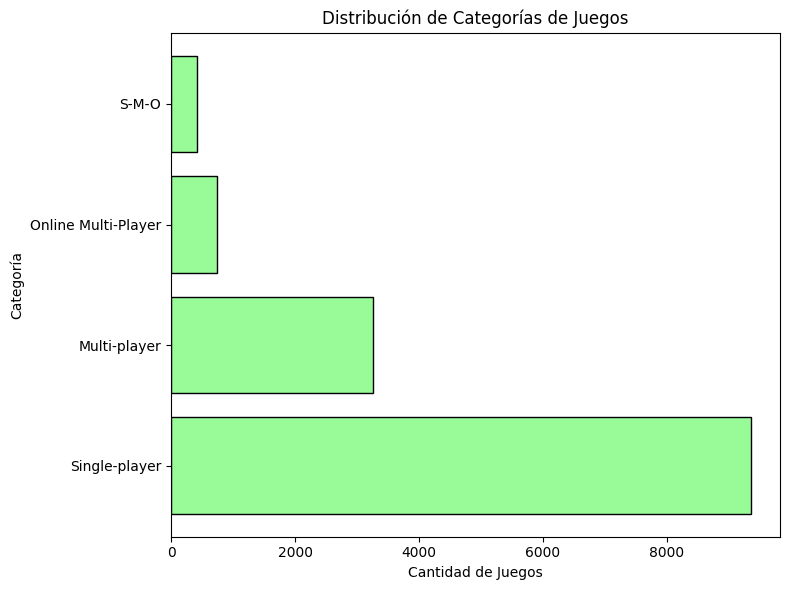

In [15]:
# Crear el gráfico de barras
categorias = ['Single-player', 'Multi-player', 'Online Multi-Player','S-M-O']
conteos = [single_player_count, multi_player_count, online_multiplayer_count,SMO_count]

plt.figure(figsize=(8, 6))
plt.barh(categorias, conteos, color='#98FB98',edgecolor='black')
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Categoría')
plt.title('Distribución de Categorías de Juegos')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [16]:
# Contar la cantidad de juegos para cada categoría
Action_count = df[df['Genres'].str.contains('Action', case=False)]['Genres'].count()
Indie_count = df[df['Genres'].str.contains('Indie', case=False)]['Genres'].count()
Strategy_count = df[df['Genres'].str.contains('Strategy', case=False)]['Genres'].count()
Sport_count = df[df['Genres'].str.contains('Sport', case=False)]['Genres'].count()
Adventure_count = df[df['Genres'].str.contains('Adventure', case=False)]['Genres'].count()
Simulation_count = df[df['Genres'].str.contains('Simulation', case=False)]['Genres'].count()
RPG_count = df[df['Genres'].str.contains('RPG', case=False)]['Genres'].count()
print(f'Cantidad de juegos Action: {Action_count}')
print(f'Cantidad de juegos Indie: {Indie_count}')
print(f'Cantidad de juegos Strategy: {Strategy_count}')
print(f'Cantidad de juegos Sport: {Sport_count}')
print(f'Cantidad de juegos Adventure: {Adventure_count}')
print(f'Cantidad de juegos Simulation: {Simulation_count}')
print(f'Cantidad de juegos RPG: {RPG_count}')

Cantidad de juegos Action: 3905
Cantidad de juegos Indie: 5764
Cantidad de juegos Strategy: 2494
Cantidad de juegos Sport: 524
Cantidad de juegos Adventure: 2894
Cantidad de juegos Simulation: 2618
Cantidad de juegos RPG: 1963


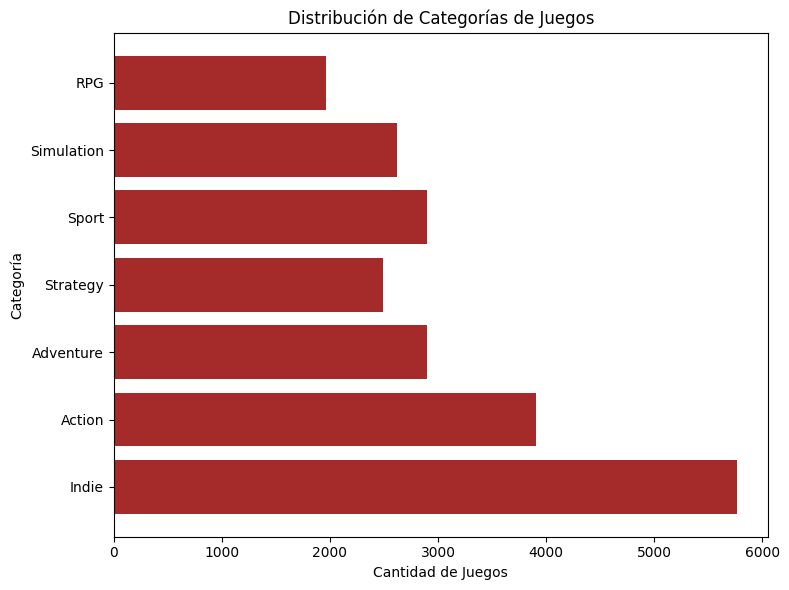

In [17]:
# Crear el gráfico de barras
categorias = ['Indie','Action','Adventure', 'Strategy','Sport','Simulation','RPG','Sport']
conteos = [Indie_count, Action_count,Adventure_count,Strategy_count,Adventure_count,Simulation_count,RPG_count,Sport_count]

plt.figure(figsize=(8, 6))
plt.barh(categorias, conteos, color='#A52A2A')
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Categoría')
plt.title('Distribución de Categorías de Juegos')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

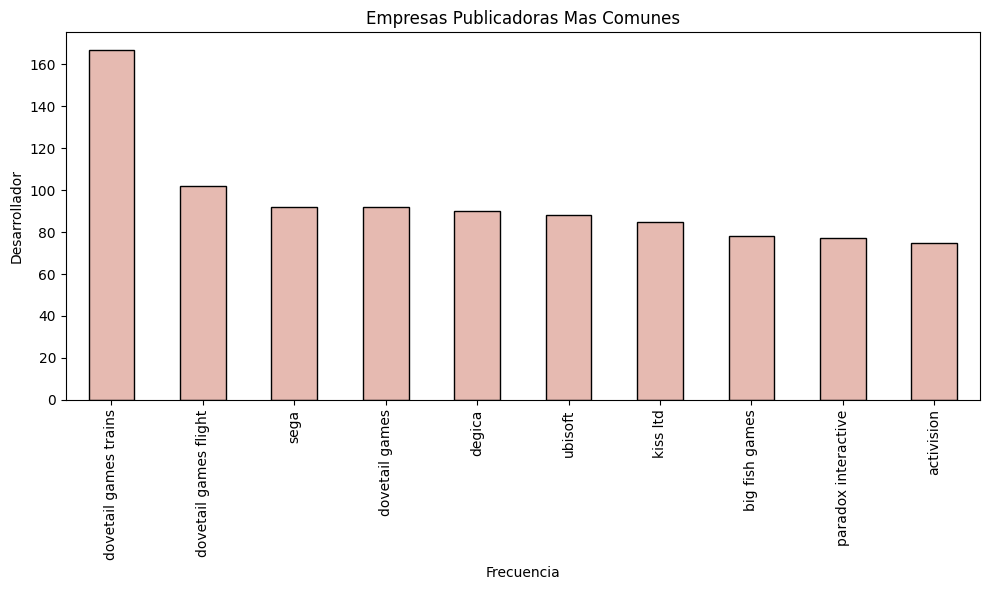

In [18]:
#Columna Publisher:

# Normalizar los nombres de las empresas publicadoras del contenido:
def normalize_developer_name(name):
    if isinstance(name, str):  # Verificar si es una cadena antes de normalizar
        cleaned_name = re.sub(r'[^a-zA-Z\s]', '', name)
        normalized_name = re.sub(r'\s+', ' ', cleaned_name.lower().strip())
        return normalized_name
    else:
        return name

df['Publisher'] = df['Publisher'].apply(normalize_developer_name)
# Filtrar las filas con valor 'sin informacion'
filtered_df = df[df['Publisher'] != normalize_developer_name('nan')]


# Contar las categorías más comunes y obtener las 10 primeras
top_categories = filtered_df['Publisher'].value_counts().nlargest(10)

# Crear un gráfico de barras invertido
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='#E6BAB1',edgecolor='black')
plt.xlabel('Frecuencia')
plt.ylabel('Desarrollador')
plt.title('Empresas Publicadoras Mas Comunes')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

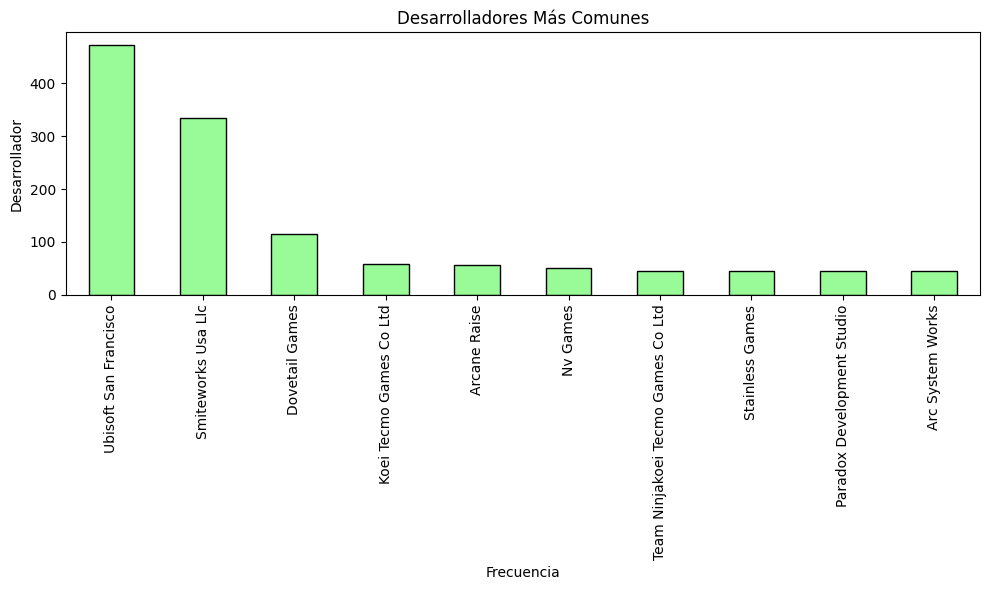

In [19]:
# Filtrar las filas con valor 'sin informacion'
filtered_df = df[df['Developer'] != normalize_developer_name('nan')]

# Contar las categorías más comunes y obtener las 10 primeras
top_categories = filtered_df['Developer'].value_counts().nlargest(10)

# Crear un gráfico de barras invertido
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='#98FB98',edgecolor='black')
plt.xlabel('Frecuencia')
plt.ylabel('Desarrollador')
plt.title('Desarrolladores Más Comunes')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

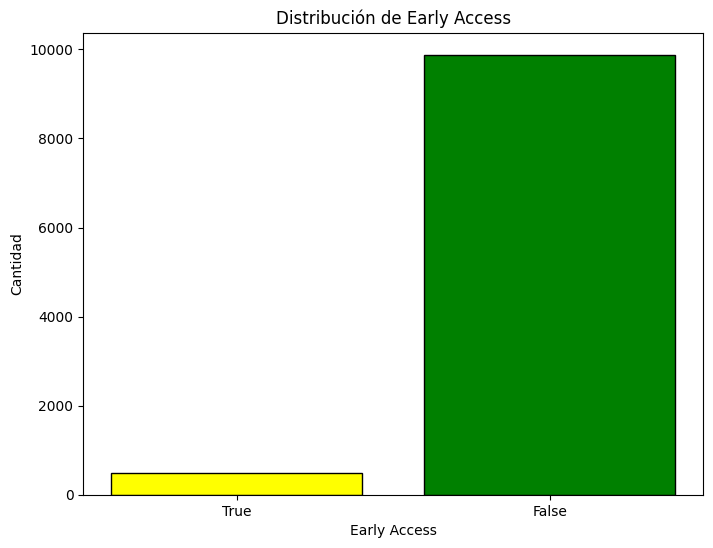

In [20]:
# Contar los valores True y False en la columna 'early_access'
true_count = df['Early_Access'].sum()
false_count = len(df) - true_count

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(['True', 'False'], [true_count, false_count], color=['yellow', 'green'],edgecolor='black')
plt.xlabel('Early Access')
plt.ylabel('Cantidad')
plt.title('Distribución de Early Access')
plt.show()

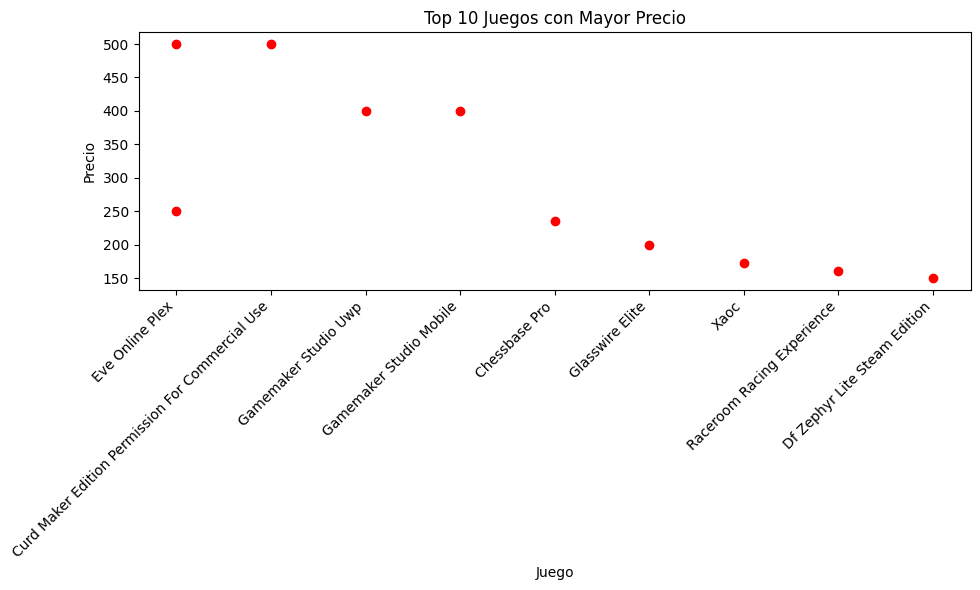

In [21]:
# Ordenar el DataFrame por precio de forma descendente
df_sorted = df.sort_values(by='Price', ascending=False)

# Obtener los nombres de los juegos y sus precios más altos
top_games = df_sorted['App_Name'][:10]
top_prices = df_sorted['Price'][:10]

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(top_games, top_prices, color='red', marker='o')
plt.xlabel('Juego')
plt.ylabel('Precio')
plt.title('Top 10 Juegos con Mayor Precio')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mayor legibilidad
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [22]:
# Nombre del juego que busco
nombre_juego_buscar = 'Curd Maker Edition Permission for Commercial Use'

# Filtrar por vj y la columna para obtener información sobre el juego específico
juego_encontrado = df[df['App_Name'] == nombre_juego_buscar]

# Ver la información del juego encontrado
print(juego_encontrado)

Empty DataFrame
Columns: [Item_Id, App_Name, Release_Date, Release_Year, Price, Genres, Specs, Early_Access, Developer, Publisher]
Index: []


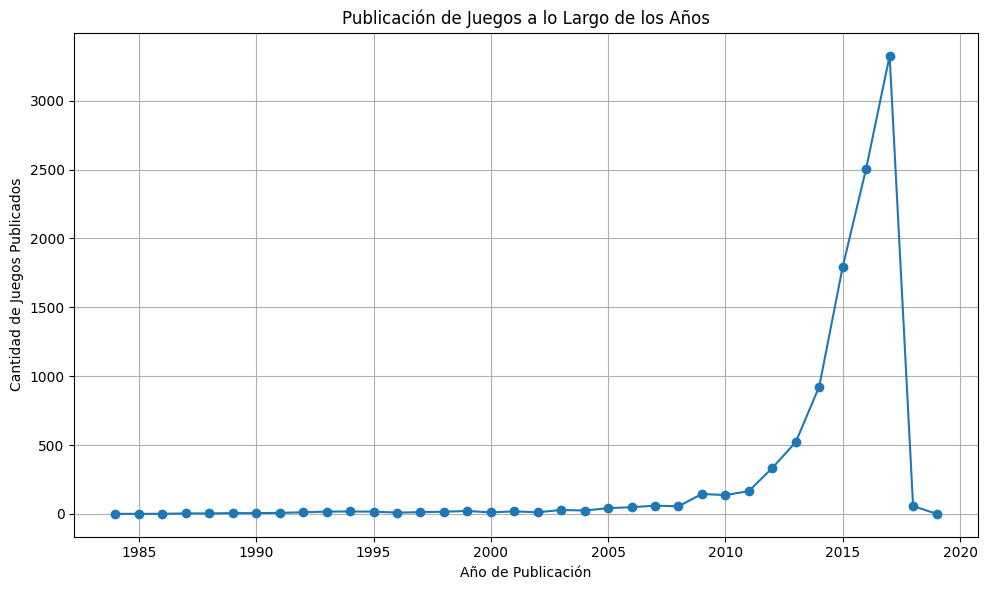

In [23]:
# Contar la cantidad de juegos publicados en cada año
publicaciones_por_año = df['Release_Year'].value_counts().sort_index()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(publicaciones_por_año.index, publicaciones_por_año.values, marker='o')
plt.xlabel('Año de Publicación')
plt.ylabel('Cantidad de Juegos Publicados')
plt.title('Publicación de Juegos a lo Largo de los Años')
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [24]:
# Encontrar el valor mínimo (primer año) y el valor máximo (último año)
primer_año = df['Release_Year'].min()
último_año = df['Release_Year'].max()

print(f'Rango de años: {primer_año} - {último_año}')

Rango de años: 1984 - 2019


In [25]:
# Año que deseas buscar
año_buscar = 2020

# obtener registros del año específico
registros_año_específico = df[df['Release_Year'] == año_buscar]
registros_año_específico

,Item_Id,App_Name,Release_Date,Release_Year,Price,Genres,Specs,Early_Access,Developer,Publisher


In [26]:
df2 = pd.read_parquet('csv/user_items.gzip')

In [28]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 56686 entries, 0 to 88308
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_Id           56686 non-null  object
 1   Steam_Id          56686 non-null  object
 2   Playtime_Forever  56686 non-null  int32 
 3   Playtime_2weeks   56686 non-null  int32 
 4   Item_Name         56686 non-null  object
 5   Item_Id           56686 non-null  object
dtypes: int32(2), object(4)
memory usage: 2.6+ MB


In [29]:
df2.head(20)

,User_Id,Steam_Id,Playtime_Forever,Playtime_2weeks,Item_Name,Item_Id
0,76561197970982479,76561197970982479,6,0,Counter-Strike,10
11,76561198079601835,76561198079601835,0,0,0,0
14,76561198064823719,76561198064823719,2261,0,Half-Life 2,220
16,76561198089393905,76561198089393905,47269,745,Garry's Mod,4000
17,76561198156664158,76561198156664158,269,0,Garry's Mod,4000
18,76561198077246154,76561198077246154,4317,0,Garry's Mod,4000
19,76561198070234207,76561198070234207,0,0,Metro 2033,43110
25,76561198030389591,76561198030389591,0,0,Dota 2 Test,205790
28,76561198043472122,76561198043472122,0,0,Counter-Strike: Source,240
39,76561198058373434,76561198058373434,260,0,Half-Life 2,220


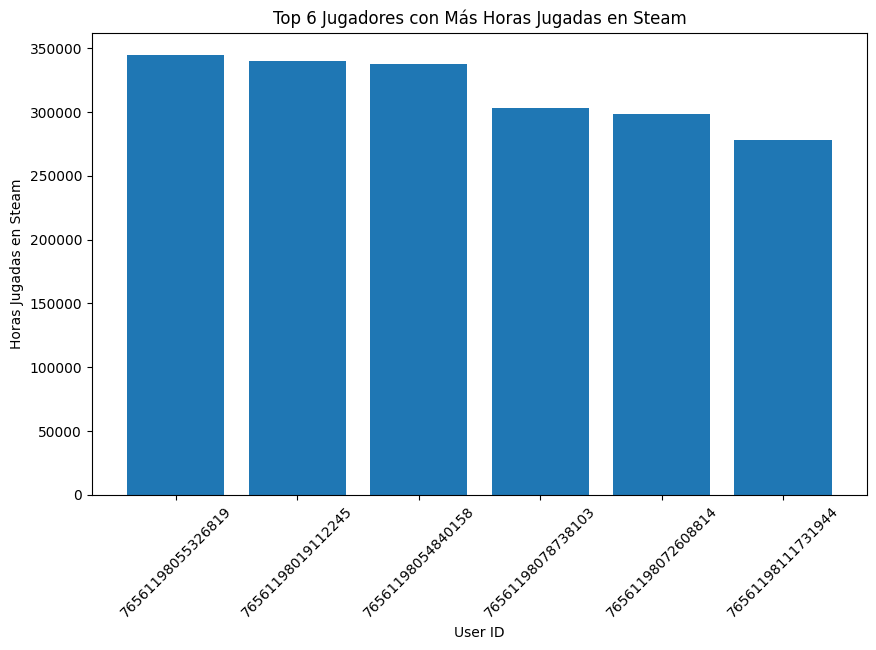

In [30]:
user_playtime = df2.groupby('User_Id')['Playtime_Forever'].sum().reset_index()
top_players = user_playtime.nlargest(6, 'Playtime_Forever')

plt.figure(figsize=(10, 6))
plt.bar(range(len(top_players)), top_players['Playtime_Forever'])
plt.xlabel('User ID')
plt.ylabel('Horas Jugadas en Steam')
plt.title('Top 6 Jugadores con Más Horas Jugadas en Steam')
plt.xticks(range(len(top_players)), top_players['User_Id'], rotation=45)
plt.show()

In [33]:
df3 = pd.read_parquet('csv/df_user_reviews.gzip')


In [34]:
df3.info()


<class 'pandas.core.frame.DataFrame'>
Index: 49186 entries, 0 to 25780
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User_Id          49186 non-null  object
 1   Posted           49186 non-null  object
 2   Item_Id          49186 non-null  object
 3   Recommend        49186 non-null  bool  
 4   Year             49186 non-null  int32 
 5   Sentiment_Score  49186 non-null  int64 
dtypes: bool(1), int32(1), int64(1), object(3)
memory usage: 2.1+ MB


In [35]:
df3.head(20)


,User_Id,Posted,Item_Id,Recommend,Year,Sentiment_Score
0,76561197970982479,2011-11-05,1250,True,2011,2
0,76561197970982479,2011-07-15,22200,True,2011,2
0,76561197970982479,2011-04-21,43110,True,2011,2
1,js41637,2014-06-24,251610,True,2014,2
1,js41637,2013-09-08,227300,True,2013,2
1,js41637,2013-11-29,239030,True,2013,2
2,evcentric,2015-12-04,370360,True,2015,2
2,evcentric,2014-11-03,237930,True,2014,2
2,evcentric,2014-10-15,263360,True,2014,2
2,evcentric,2014-10-15,107200,True,2014,2


In [36]:
df3_sample = df3.sample(n=40000, random_state=42)

In [37]:
df2_sample = df2.sample(n=40000, random_state=42)

In [38]:
df3_sample

,User_Id,Posted,Item_Id,Recommend,Year,Sentiment_Score
7055,Saephin,2014-03-09,205100,True,2014,0
10426,76561198085327867,2014-07-09,304930,True,2014,2
16272,jmatcott,2014-09-30,241930,True,2014,0
16405,Imposs1bru,2014-08-03,221100,True,2014,2
21461,76561198064337473,2014-08-23,440,True,2014,2
...,...,...,...,...,...,...
11610,shemwuw,2013-12-03,440,True,2013,0
15362,76561198075422436,2015-10-23,304050,True,2015,2
1858,Karetchi,2015-12-07,250600,True,2015,0
8267,TheZomyo,2015-04-12,107410,False,2015,2


In [39]:
df2_sample

,User_Id,Steam_Id,Playtime_Forever,Playtime_2weeks,Item_Name,Item_Id
5583,76561198097857735,76561198097857735,302,0,PlanetSide 2,218230
27651,76561198100221884,76561198100221884,1089,0,Garry's Mod,4000
70134,76561198074633617,76561198074633617,0,0,Dota 2 Test,205790
74895,76561198082483754,76561198082483754,27,0,Counter-Strike: Source,240
26910,76561198080279802,76561198080279802,2541,0,Garry's Mod,4000
...,...,...,...,...,...,...
18210,76561198062516378,76561198062516378,237,1,Counter-Strike: Source,240
78453,76561198088606103,76561198088606103,2329,0,Left 4 Dead 2,550
31758,76561198061556863,76561198061556863,9260,0,Garry's Mod,4000
46716,76561198018592164,76561198018592164,1180,0,Half-Life 2,220


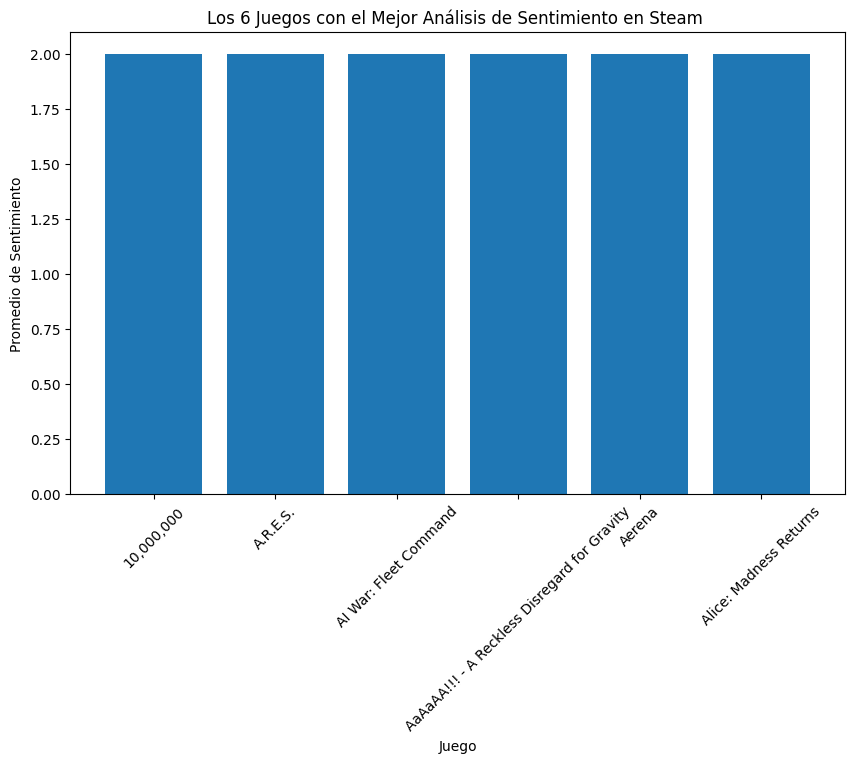

In [40]:
df2_sample = df2.sample(n=40000, random_state=42)
df3_sample = df3.sample(n=40000, random_state=42)


df_merged = df3_sample.merge(df2_sample[['Item_Id', 'Item_Name']], on='Item_Id', how='inner')
average_sentiment_by_game = df_merged.groupby('Item_Name')['Sentiment_Score'].mean().reset_index()
top_games_sentiment = average_sentiment_by_game.nlargest(6, 'Sentiment_Score')

# Paso 4: Crear el gráfico
plt.figure(figsize=(10, 6))
plt.bar(top_games_sentiment['Item_Name'], top_games_sentiment['Sentiment_Score'])
plt.xlabel('Juego')
plt.ylabel('Promedio de Sentimiento')
plt.title('Los 6 Juegos con el Mejor Análisis de Sentimiento en Steam ')
plt.xticks(rotation=45)
plt.show()

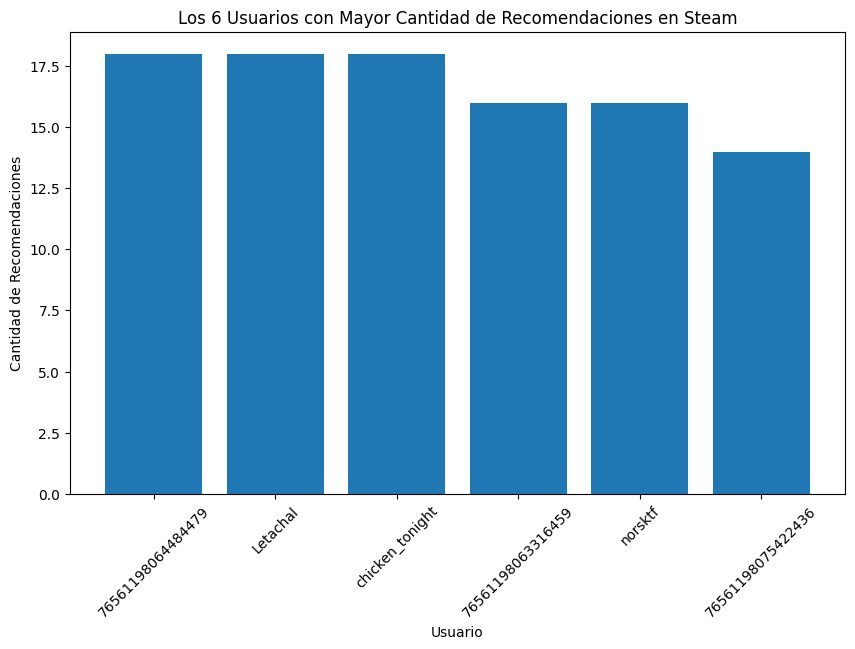

In [41]:
df3_recommended = df3[df3['Recommend'] == True]
user_recommendation_counts = df3_recommended.groupby('User_Id')['Recommend'].count().reset_index()
top_users_recommendations = user_recommendation_counts.nlargest(6, 'Recommend')


plt.figure(figsize=(10, 6))
plt.bar(top_users_recommendations['User_Id'], top_users_recommendations['Recommend'])
plt.xlabel('Usuario')
plt.ylabel('Cantidad de Recomendaciones')
plt.title('Los 6 Usuarios con Mayor Cantidad de Recomendaciones en Steam')
plt.xticks(rotation=45)
plt.show()

In [42]:
# Cuanto es el porcentaje de juegos recomendados y cuantos no lo son

recommend_percentages = df3['Recommend'].value_counts(normalize=True) * 100

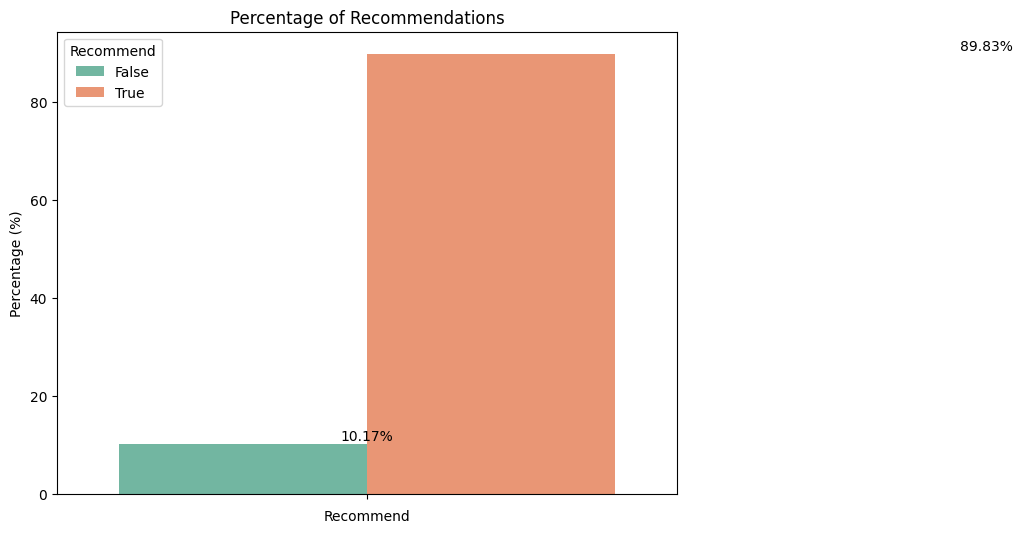

In [43]:
# Calcular los porcentajes de True y False en la columna 'Recommend'
recommend_percentages = df3['Recommend'].value_counts(normalize=True) * 100
recommend_percentages = recommend_percentages[::-1]


plt.figure(figsize=(8, 6))
sns.barplot(hue=recommend_percentages.index, y=recommend_percentages.values, palette='Set2')
plt.xlabel('Recommend')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Recommendations')

for index, value in enumerate(recommend_percentages.values):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

plt.show()